# Multi-layer Forward-feed NN 

## 1. Plotting Decision Boundaries
## 2. The Problem of Overfitting: Training vs. Validation Sets
## 3. The Regularization Parameter: alpha


In [1]:
%matplotlib inline
# All imports

from random import choice
import numpy as np
import matplotlib.pyplot as plt
# from copy import copy
# import time
# from IPython import display


# from sklearn.neural_network import MLPClassifier

np.set_printoptions(formatter={'float': '{:.5f}'.format})


In [2]:
import sklearn
# print(sklearn.__version__)

# ------------> Note: new imports <------------------
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split

## Let's take a look at the sklearn neural network documentation:

http://scikit-learn.org/dev/modules/neural_networks_supervised.html

## Summary: 

- ## Activation: {‘logistic’, ‘tanh’, ‘relu’}; for classifcation: default ‘relu’

     Activation function for the hidden layer.

     ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).

     ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).

     ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)
     
     From experience: 
     
     'relu' is effective for classification, but NOT for regression -- why?  
     Whereas 'tanh' is much better for regression.

- ## Important Attributes (suppose we're using a classifier):

    clf.coefs\_
    
    clf.intercepts\_ weights for just biases
    
    clf.loss\_ loss function
    
    clf.out\_activation\_ sigmoid function
    
    clf.score
    
    clf.decision_function (has to be accessed a different way -- see my comments for the decision_function cell in Week9-1)
    
- ## Methods:

    fit(X, y)  Fit the model to data matrix X and target(s) y.

    get_params([deep]) Get parameters for this estimator.

    predict(X)  Predict using the multi-layer perceptron classifier

    predict_log_proba(X)  Return the log of probability estimates.

    predict_proba(X)   Probability estimates.

    score(X, y[, sample_weight])   Return the mean accuracy on the given test data and labels.

    set_params(\*\*params)  Set the parameters of this estimator.
    
- ## Difference between a classifier and a regressor:

    The regressror (fitting model, chi2 minimization) does NOT have an output activation function, or 
    
    The output activation funciton for the regressor is the identity



## Now, our favorite problem the XOR

In [3]:
X_train = np.array([[0, 0],
                  [0, 1],          
                  [1, 0],
                  [1, 1]])

y_train = np.array([0, 1, 1, 0])

# using 'tanh' as activation function
# default value: learning_rate_init = 0.001 way too slow,
# so change it to 0.2
#solver='lbfgs' is for second derivative
#alpha really low, so bassically no regularization but not zero to avoid instability problems
# random_state is like seed, not stocastic, so that it is reprodusable, to make sure training keeps going through same sequence
clf = MLPClassifier(solver='lbfgs', alpha=1e-10, hidden_layer_sizes=(2, 2), activation = 'tanh', \
                    random_state=5, max_iter=10000, learning_rate_init=0.1)

# try sgd
# clf = MLPClassifier(solver="sgd", alpha=1e-5, hidden_layer_sizes=(2, 2), activation='tanh', \
#                     random_state=5, max_iter=10000, learning_rate_init = 0.1)

clf.fit(X_train, y_train)
print(X_train)
clf.predict(X_train)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


array([0, 1, 1, 0])

## Breakout Exercise:

## Modify the function visual_NN_boundaries from previous class to generate 2000 random points in the square of x1 between (0, 1) and x2 between (0, 1) to visualize the decision boundaries, where x1 and x2 are Cartesian coordinates:

## 1. Explicitly instantiate the subplot (or Axes) object:

    fig, ax = plt.subplots()
    
## 2. Set the aspect ratio to 1:1

    ax.set_aspect('equal')
    
## 3. Try plotting with or without this line

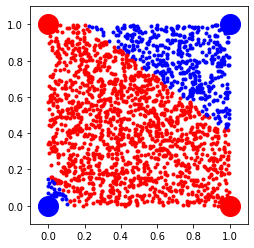

In [4]:
'''
Breakout Solution:

Two-layer NN as a classifier, using XOR truth table.
'''

def visual_NN_boundaries(X_train, y_train, Nsamp = 2000):
    X = np.random.rand(2000, 2)

    z = clf.predict(X)
    
    fig, ax = plt.subplots()
    ax.set_aspect('equal')#this makes the figure a square
    for i, x in enumerate(X):
        if z[i]:
            plt.plot(x[0], x[1], 'r.')
        else:
            plt.plot(x[0], x[1], 'b.')

    plt.axis([-0.1, 1.1, -0.1, 1.1])

    for i, x_train in enumerate(X_train):
        if y_train[i]:
            plt.plot(x_train[0], x_train[1], 'ro', ms = 20)
        else:
            plt.plot(x_train[0], x_train[1], 'bo', ms = 20)

    plt.show()
    
visual_NN_boundaries(X_train, y_train)

## Breakout Exercise:

## Instead of using random pairs of (x1, x2) coordinates, now generate a grid of points for x1 between [0, 1) and for x2 between [0, 1).  Find the predictions (that is, the the output, z) by using the trained classifier for these points.  Try a (10, 10) grid first.


## Suggestions: 

    1. Use np.meshgrid() to creat 100 pairs of (x1, x2) coordinates)
    2. Flatten the 2d arrays that correspond to all the x1 values and all the x2 values
    3. Create X by using np.column_stack().  Remmember X should be in this case 100 pairs of (x1, x2)
    4. Make prediction using the trained nn
    5. Print the predictions z for all 100 points

## Then use 

    plt.contourf() 
    
to demarcate the boundaries.  A useful resource: 

https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.contourf.html

Predictions: 
 [[0 0 1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 0]
 [1 1 1 1 1 1 1 1 0 0]
 [1 1 1 1 1 1 1 0 0 0]
 [1 1 1 1 1 0 0 0 0 0]
 [1 1 1 1 0 0 0 0 0 0]]


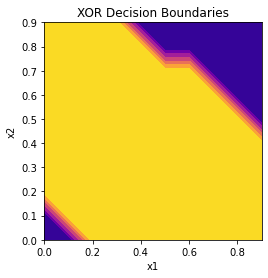

In [5]:
#1. Use np.meshgrid() to creat 100 pairs of (x1, x2) coordinates)
# x = np.arange(0, 1, 0.1)
# x1, x2 = np.meshgrid(x, x)
#more general way:
x1_min, x1_max = X_train.T[0].min(), X_train.T[0].max()
x2_min, x2_max = X_train.T[1].min(), X_train.T[1].max()
step_size = 0.1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, step_size), np.arange(x2_min, x2_max, step_size))

# 2. Flatten the 2d arrays that correspond to all the x1 values and all the x2 values
shape = x1.shape
x1_flat = x1.ravel()
x2_flat = x2.ravel()

# 3. Create X by using np.column_stack(). coordinates
X = np.column_stack((x1_flat, x2_flat))

# 4. Make prediction using the trained nn
z = clf.predict(X)
z = z.reshape(shape)
# 5. Print the predictions z for all 100 points
print('Predictions: \n', z)
fig, ax = plt.subplots()
ax.set_aspect('equal')
cs = plt.contourf(x1, x2, z, cmap=plt.cm.plasma) #contourf is find contour and fill
ax.set_title('XOR Decision Boundaries')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
plt.show()
# ax.imshow(z, extent=[0, 1, 0, 1])

In [6]:
print('x values for the training set:', X_train.T[0])
print('y values for the training set:', X_train.T[1])

x values for the training set: [0 0 1 1]
y values for the training set: [0 1 0 1]


## ANN for Regression

## In the (1, 1, 1) NN, you are only able to generate the activation function.

- ## The input-to-hidden layer weight passes through the activation function and so it sets the scale for independnect variable (usu. x).
- ## The the hidden layer-to-output layer weight, on the other hand, doesn't pass through the activation function (at least not the same one as the hidden layer), and it sets the vertical scale.

Total number of points: 40
Total number of weights: [(1, 1), (1, 1)]
Loss function 0.3491153171692497
score 0.9662101514501872


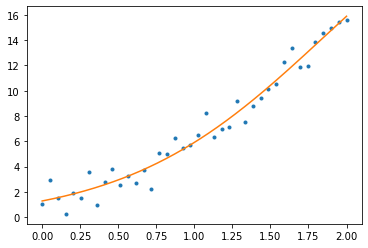

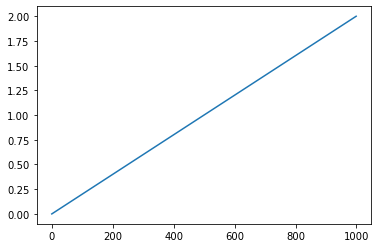

In [7]:
from sklearn.neural_network import MLPRegressor

N = 40
xmin = 0.
xmax = 2.
x = np.linspace(xmin, xmax, N)
# expects a 2d array.
X = np.atleast_2d(x).T

a0 = 1.5
a1 = 2.
a2 = 2.5

#Quadratic function:
y = a0 + a1*x + a2*x**2  # - a3*x**3 + a4*x**4
# add noise
y += np.random.randn(y.shape[0]) * 1. 

# even though there is only one node, it allows for non-linearity throught the tanh funcion.
# For regression, don't use the rectifier!!
# So in the (1, 1, 1) NN, the nonlinearity comes directly from tanh
#only 1 hidden layer with only 1 neuron
reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(1,), activation='tanh',\
                    random_state=1, max_iter=1000000, learning_rate_init=0.1)

#train:
reg.fit(X, y)
# print('X_train:', X_train)
# print('y_train:', y_train)
# print('Prediction:')
print("Total number of points:", N)
print("Total number of weights:", [coef.shape for coef in reg.coefs_])
print("Loss function", reg.loss_)


# score = 1 is the best; 
# score = 0 corresponds to fitting the data with a flat line
# score can be negative, as a fit can be arbitrarily bad!!
print("score", reg.score(X, y))

x_plot = np.linspace(xmin, xmax, 1000)
X_plot = np.atleast_2d(x_plot).T

y_predict = reg.predict(X_plot)
plt.plot(x, y, '.')
plt.plot(x_plot, y_predict)
plt.show()

#Architecture: [1, 1, 1]
plt.plot(x_plot)
plt.show()


In [45]:
reg.out_activation_

'identity'

## Let's look at the weights

## Breakout:

- ## 1. Draw the schematic for this NN

- ## 2. Write out the output, z, in terms of the input x and the weights (including weights for the bias units), and the tanh function.

- ## 3. Impeplement 2. numerically and show that it is exactly the same as the output from the 1-1-1 NN.

In [8]:
def tanh(x):
    sinh = (np.exp(x) - np.exp(-x))/2
    cosh = (np.exp(x) + np.exp(-x))/2
    return sinh/cosh

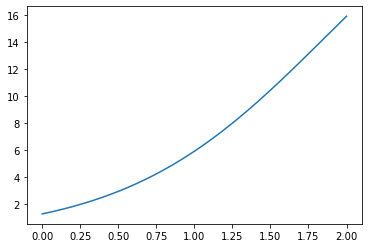

In [9]:
w1 = reg.coefs_[0][0][0]
w2 = reg.coefs_[1][0][0]
bias1 = reg.intercepts_[0][0]
bias2 = reg.intercepts_[1][0]
# z = bias2 + tanh(X_plot * reg.coefs_[0][0][0] + bias1) * reg.coefs_[1][0][0]


a = X_plot * w1 + bias1 
z = bias2 + tanh(a) *w2
# z = A * w2    
# z = tanh(b) + bias2
plt.plot(x_plot, z)
plt.show()

In [10]:
print(reg.coefs_[0][0, 0], reg.coefs_[1][0][0])

-0.760904070267097 -14.63086626267951


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Total number of points: 40
Total number of weights: [(1, 100), (100, 1)]
Loss function 0.02976518398324972
score 0.9993278431690975
(1000,)
(1000, 1)


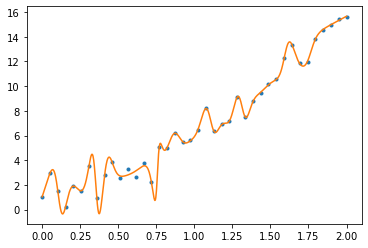

In [11]:
reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(1,), activation='tanh',\
                    random_state=1, max_iter=1000000, learning_rate_init=0.1)


reg.hidden_layer_sizes=(100,)
reg.fit(X, y)

print("Total number of points:", N)
print("Total number of weights:", [coef.shape for coef in reg.coefs_])
print("Loss function", reg.loss_)
print("score", reg.score(X, y))

x_plot = np.linspace(xmin, xmax, 1000)
X_plot = np.atleast_2d(x_plot).T
print(x_plot.shape)
print(X_plot.shape)


y_predict = reg.predict(X_plot)
plt.plot(x, y, '.')
plt.plot(x_plot, y_predict)
plt.show()

#1 input of 40 elements
#100 hidden layer size
#1 output
#every layer has a bias, 1 bias for input + 1 bias for hidden layer
#arquitecture: 1, 100, 1, 
#DOF is data points minus free parameters, should be at least 1 b/c you need 
#here we have too many DOFs, this is called Overfitting, and fitting through noise, not signal


(30, 1) (30,)
(10, 1) (10,)
Total number of points: 30
Total number of weights: [(1, 100), (100, 1)]
score 0.9999956264529701
Loss function 0.007882150982020435


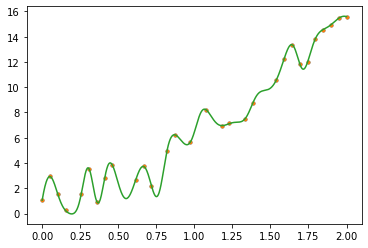

In [14]:
'''Splitting data into training and validation (testing) sets'''

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
#0.25, a quarter of the data, you get 2 data sets, training set and testing/validation set
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

# reg = MLPRegressor(algorithm='l-bfgs', hidden_layer_sizes=(80,), activation='tanh',\
#                     random_state=1, max_iter=10000, learning_rate_init = 0.01)

reg.hidden_layer_sizes = (100, )

reg.fit(X_train, y_train)

print("Total number of points:", y_train.shape[0])
print("Total number of weights:", [coef.shape for coef in reg.coefs_])
#just weights for neurons, not including biases
print("score", reg.score(X_train, y_train))
#1 score is the best
print("Loss function", reg.loss_)

x_train = X_train.ravel()
sort_i = np.argsort(x_train)
x_train = x_train[sort_i]
y_train = y_train[sort_i]
plt.plot(x_train, y_train, '.')

X_plot = np.atleast_2d(np.linspace(0., 2., 1000)).T
x_plot = X_plot.ravel()

y_predict = reg.predict(X_plot)
#now we have a model to predict the outcomes
plt.plot(x_train, y_train, '.')
plt.plot(x_plot, y_predict)
plt.show()

score 0.6682894083618423


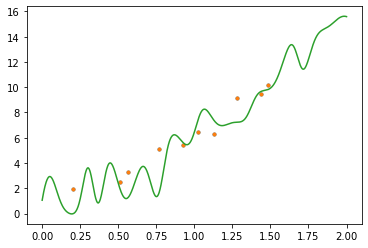

In [15]:
print("score", reg.score(X_test, y_test))
#how do you test how well that model predicts?
#to put this model that we got form the trainig sample, and test on test sample
x_test = X_test.ravel()
sort_i = np.argsort(x_test)
x_test = x_test[sort_i]
y_test = y_test[sort_i]
plt.plot(x_test, y_test, '.')

plt.plot(x_test, y_test, '.')
plt.plot(x_plot, y_predict)
plt.show()
#we see that the original model overfitted the data

Total number of points: 30
Total number of weights: [(1, 1), (1, 1)]
Training score 0.9651722989470738
Loss function 0.4282792035245031


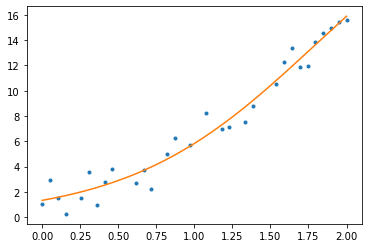

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

#we go back to our original model and only train on training data
reg.hidden_layer_sizes=(1,)

reg.fit(X_train, y_train)
# print('X_train:', X_train)
# print('y_train:', y_train)
# print('Prediction:')
print("Total number of points:", y_train.shape[0])
print("Total number of weights:", [coef.shape for coef in reg.coefs_])
print("Training score", reg.score(X_train, y_train))
print("Loss function", reg.loss_)

x_train = X_train.ravel()

y_predict = reg.predict(X_train)
sort_i = np.argsort(x_train)
x_train = x_train[sort_i]
y_train = y_train[sort_i]


X_plot = np.atleast_2d(np.linspace(0., 2., 1000)).T
x_plot = X_plot.ravel()

y_predict = reg.predict(X_plot)

plt.plot(x_train, y_train, '.')
plt.plot(x_plot, y_predict)
plt.show()

score 0.9696028004732202
Loss function 0.4282792035245031


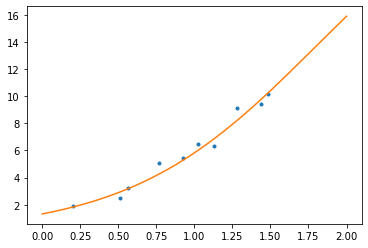

In [17]:
print("score", reg.score(X_test, y_test))
print("Loss function", reg.loss_)
X_plot = np.atleast_2d(np.linspace(0., 2., 1000)).T
x_plot = X_plot.ravel()
#now this model works better on the test set
#in this case, suing a less sofisticated architecture, gives you a better model
#
y_predict = reg.predict(X_plot)

x_test = X_test.ravel()
sort_i = np.argsort(x_test)
x_test = x_test[sort_i]
y_test = y_test[sort_i]
plt.plot(x_test, y_test, '.')
plt.plot(x_plot, y_predict)

plt.show()

## The Power of Regularization

Total number of points: 30
Total number of weights: [(1, 100), (100, 1)]
Training score 0.9650770488043188
Loss function 0.5008577399263705


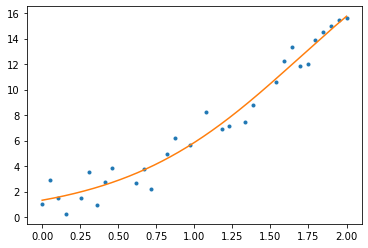

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

reg.hidden_layer_sizes=(100,)
#now turn up regularization to avoid overfitting, it is not exactly a simple curve but more complex b/c of the neurons
#regularization is a demand that the model be as smooth as possible but not crazy smooth, also has onculations
reg.alpha = 0.2
#the smaller the alpha, the more ondulation, the bigger alpha, the more smooth

reg.fit(X_train, y_train)
# print('X_train:', X_train)
# print('y_train:', y_train)
# print('Prediction:')
print("Total number of points:", y_train.shape[0])
print("Total number of weights:", [coef.shape for coef in reg.coefs_])
print("Training score", reg.score(X_train, y_train))
print("Loss function", reg.loss_)

x_train = X_train.ravel()

y_predict = reg.predict(X_train)
sort_i = np.argsort(x_train)
x_train = x_train[sort_i]
y_train = y_train[sort_i]


X_plot = np.atleast_2d(np.linspace(0., 2., 1000)).T
x_plot = X_plot.ravel()

y_predict = reg.predict(X_plot)

plt.plot(x_train, y_train, '.')
plt.plot(x_plot, y_predict)
plt.show()

score 0.9702349145540765
Loss function 0.5008577399263705


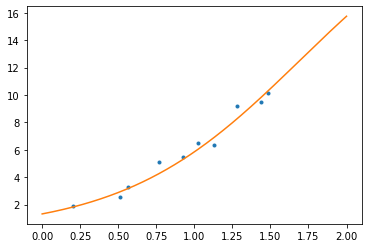

In [19]:
print("score", reg.score(X_test, y_test))
print("Loss function", reg.loss_)
X_plot = np.atleast_2d(np.linspace(0., 2., 1000)).T
x_plot = X_plot.ravel()

y_predict = reg.predict(X_plot)

x_test = X_test.ravel()
sort_i = np.argsort(x_test)
x_test = x_test[sort_i]
y_test = y_test[sort_i]
plt.plot(x_test, y_test, '.')
plt.plot(x_plot, y_predict)

plt.show()

# End of Week11-2